### Test inicjalizacji drzewa

Przygotowujemy przykładowy zbiór danych (złuży on do wyliczania klas liści) oraz kilkukrotnie wypisujemy wygenerowane drzewo.

In [1]:
import tree
import pandas as pd
import random

def leaf_probability(depth: int):
    if depth == 0:
        return 0.0
    else:
        return 0.25

X_train = pd.DataFrame([(3, 2), (1, 4), (4, 1)], index=[0, 1, 2], columns=['a', 'b'])
y_train = pd.Series([0, 0, 1], index=[0, 1, 2])

random.seed(5)

In [2]:
res = tree.init_tree(3, 2, [(1, 5), (1, 5)], 2, leaf_probability, X_train, y_train)
res2 = tree.init_tree(3, 2, [(1, 5), (1, 5)], 2, leaf_probability, X_train, y_train)

tree.print_tree(res)
print("\n\n")
tree.print_tree(res2)

               (1|4.18)                
     (0|4.36)            (0|1.05)      
(0|3.60)  (0|2.49)     [1]       [0]   
[0]  [1]  [0]  [1]                     



               (0|1.56)                
     (0|1.53)            (0|4.87)      
(0|1.84)  (1|2.25)  (1|1.09)  (0|2.06) 
[0]  [1]  [0]  [1]  [1]  [0]  [1]  [0] 


Inicjalizacja drzew działa poprawnie.

### Testy reprodukcji
Rysujemy histogramy przedstawiające rozkład elementów wybranych przez reprodukcję.

Na potrzeby reprodukcji proporcjonalnej, wartości funkcji oceny dla drzew są równe czwartym potęgom kolejnych liczb naturalnych.

In [3]:
from reproduction import *
from matplotlib import pyplot as plt
from tree import *

In [4]:
def plot_reproduction_histogram(reproduction):
    trees = [DecisionTree(LeafNode(0)) for _ in range(20)]
    fitnesses = [float((20 - x) ** 4) for x in range(20)]
    selected: list[DecisionTree] = []
    for _ in range(20000):
        selected += reproduction(trees, fitnesses)
    counts = [0] * 20
    for tree in selected:
        counts[trees.index(tree)] += 1
    plt.bar(list(range(20)), counts)
    plt.xticks(list(range(20)), [str(i) for i in range(20)])
    plt.xlabel("Ranga elementu")
    plt.ylabel("Liczba, ile razy został wybrany element")
    plt.show()

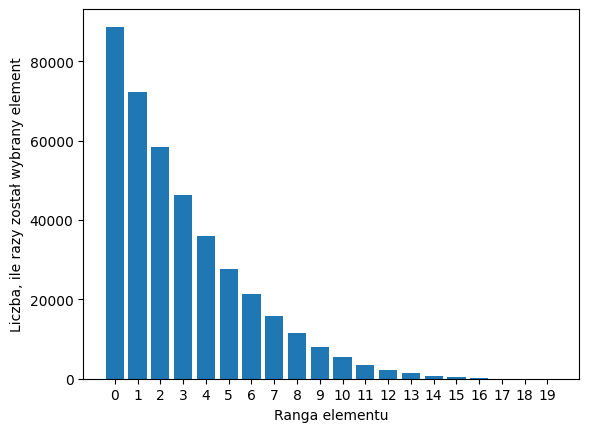

In [5]:
plot_reproduction_histogram(
    proportional_reproduction
)

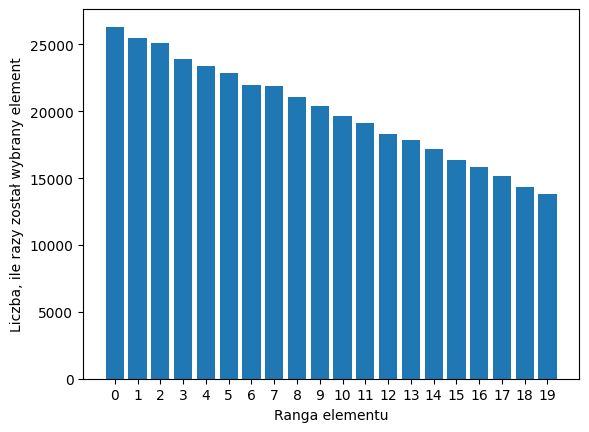

In [6]:
plot_reproduction_histogram(
    lambda trees, fitnesses:
    rank_reproduction(trees, fitnesses, 1/4, 1/4)
)

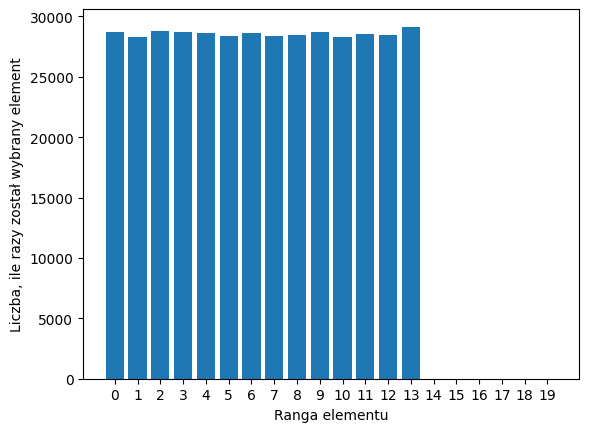

In [7]:
plot_reproduction_histogram(
    lambda trees, fitnesses:
    truncation_reproduction(trees, fitnesses, 2/3)
)

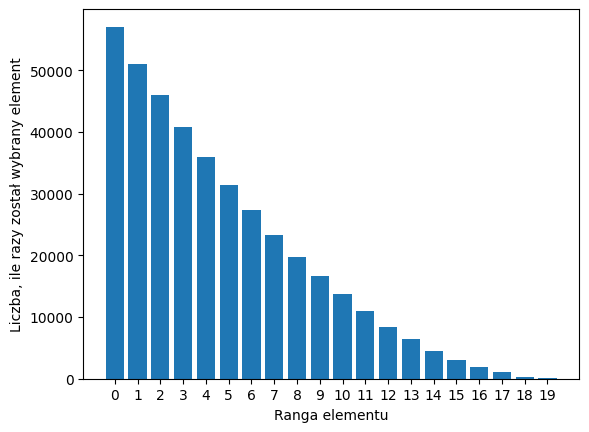

In [8]:
plot_reproduction_histogram(
    lambda trees, fitnesses:
    tournament_reproduction(trees, fitnesses, 3)
)

Histogramy wyglądają tak, jak powinny dla tych reprodukcji. Implementacja reprodukcji jest poprawna.